In [1]:
# imports and configs

import sys
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

sns.set(style="ticks")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))

# sys.path.append("../tools/")
sys.path.append("../MachineLearning/tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

/Users/adamklim/anaconda/envs/DAND/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# functions

def max_val_feature():
    '''
    lists maximal values for features included in feature_list
    '''
    for feature in features_list[1:]:
        print '\n' ,feature
        val = []
        index = 0
        for i in data_dict:
            val_dict = data_dict[i][feature]
            if val_dict != 'NaN':
                val.append(val_dict)
        for i in data_dict:
            val_dict1 = data_dict[i][feature]
            if val_dict1 == max(val):
                print max(val)
                print i


def plot_features(val):
    '''
    grid plot of features, using pandas dataframe,
    index column added for easy visualization
    '''
    df = pd.DataFrame(val, index=range(len(val)), columns=features_list)
    df['index'] = range(len(val))
    
    for i in range(int(math.ceil(len(features_list)/4.))):
        g = sns.PairGrid(df, x_vars=features_list[i*4:i*4+4], y_vars=['index'], size=3, hue='poi')
        g.map(plt.scatter, alpha=.5, s=30);

        
def add_feature():
    for i in data_dict[data_dict.keys()[0]].keys():
        if i not in features_list:
            features_list.append(i)
    features_list.remove('email_address')
    
    
def data_create():
    data = featureFormat(data_dict, features_list)
    label, features = targetFeatureSplit(data)
    return data


def ratio_feature (new_feat, feat, sum_feat):
    for i in my_dataset.keys():
        try:
            my_dataset[i][new_feat] = float(my_dataset[i][feat])/my_dataset[i][sum_feat]
        except:
            if my_dataset[i][feat] == 'NaN':
                my_dataset[i][new_feat] = 0.0    
#     return my_dataset

Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question.

In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

features_list = ['poi'] # You will need to use more features


### Load the dictionary containing the dataset

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
#     data = featureFormat(data_dict, features_list)

# Data exploration and cleanup

Let's get an overview of the dataset we're dealing with

In [4]:
# exploration: data points counts, features counts, poi counts

print "Data points: ", len(data_dict)
print "Features: ", len(data_dict[data_dict.keys()[0]])

poi_count = 0
for i in data_dict.values():
 if i['poi']:
    poi_count += 1
print "POIs: ", poi_count

Data points:  146
Features:  21
POIs:  18


In [5]:
# List data points and if pois

for i in data_dict.keys():
    print i, ' - poi: ',data_dict[i]['poi']

METTS MARK  - poi:  False
BAXTER JOHN C  - poi:  False
ELLIOTT STEVEN  - poi:  False
CORDES WILLIAM R  - poi:  False
HANNON KEVIN P  - poi:  True
MORDAUNT KRISTINA M  - poi:  False
MEYER ROCKFORD G  - poi:  False
MCMAHON JEFFREY  - poi:  False
HORTON STANLEY C  - poi:  False
PIPER GREGORY F  - poi:  False
HUMPHREY GENE E  - poi:  False
UMANOFF ADAM S  - poi:  False
BLACHMAN JEREMY M  - poi:  False
SUNDE MARTIN  - poi:  False
GIBBS DANA R  - poi:  False
LOWRY CHARLES P  - poi:  False
COLWELL WESLEY  - poi:  True
MULLER MARK S  - poi:  False
JACKSON CHARLENE R  - poi:  False
WESTFAHL RICHARD K  - poi:  False
WALTERS GARETH W  - poi:  False
WALLS JR ROBERT H  - poi:  False
KITCHEN LOUISE  - poi:  False
CHAN RONNIE  - poi:  False
BELFER ROBERT  - poi:  False
SHANKMAN JEFFREY A  - poi:  False
WODRASKA JOHN  - poi:  False
BERGSIEKER RICHARD P  - poi:  False
URQUHART JOHN A  - poi:  False
BIBI PHILIPPE A  - poi:  False
RIEKER PAULA H  - poi:  True
WHALEY DAVID A  - poi:  False
BECK SALLY W  -

In [6]:
# list features, and add remaining features to features_list
add_feature()

In [7]:
data = data_create()

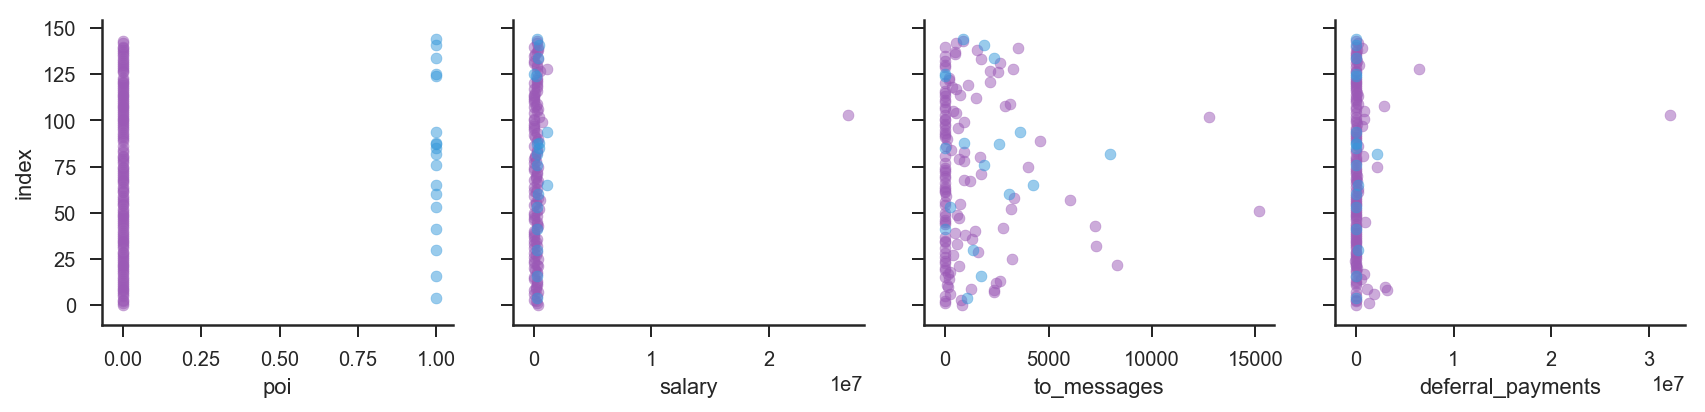

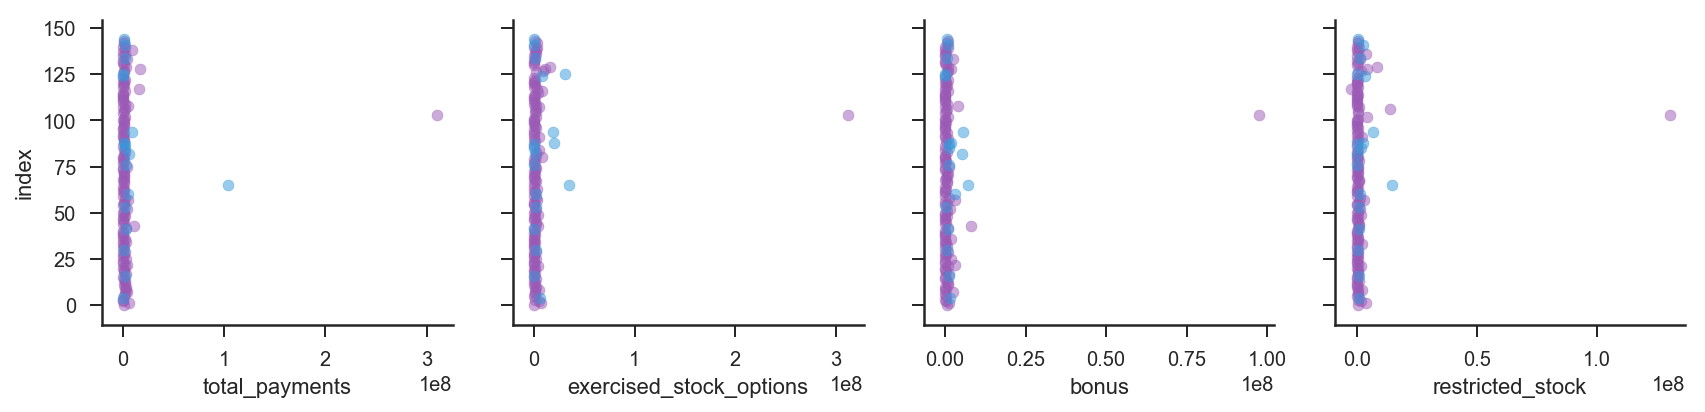

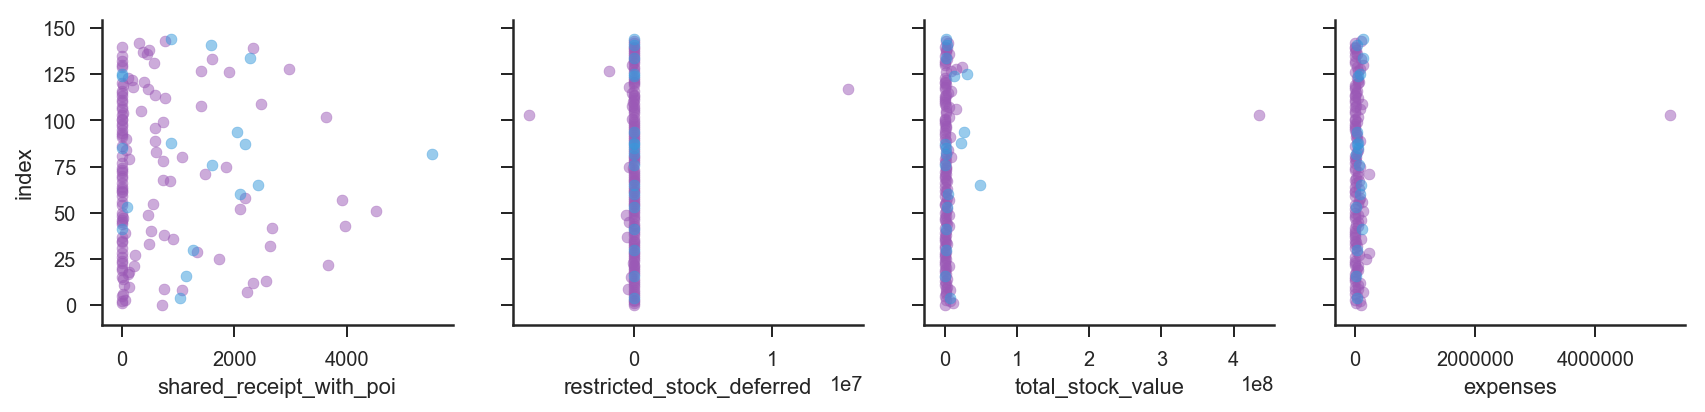

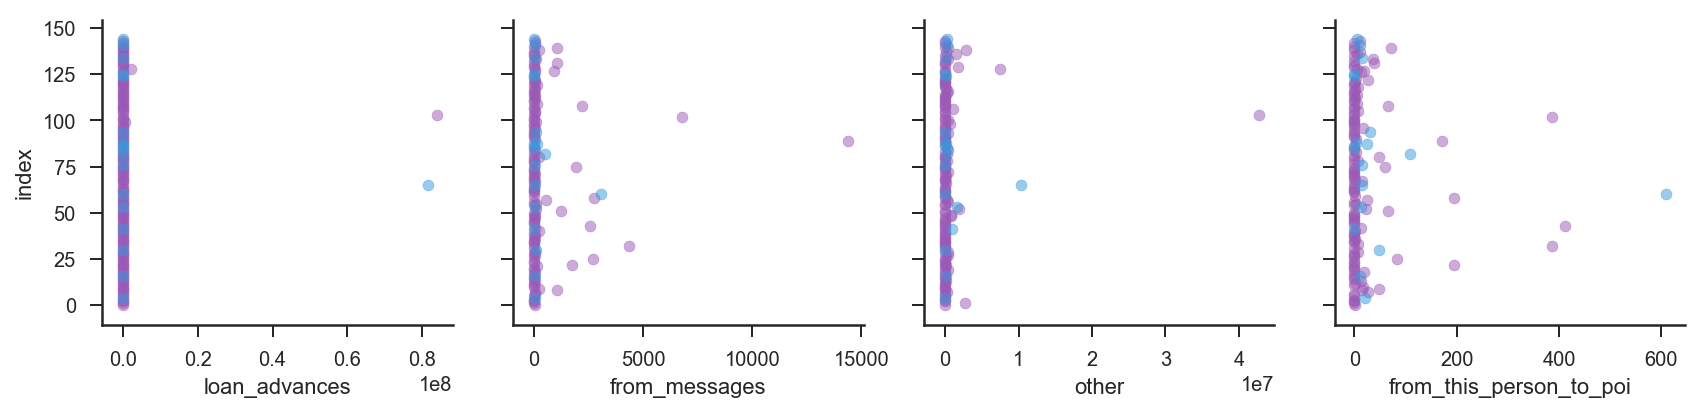

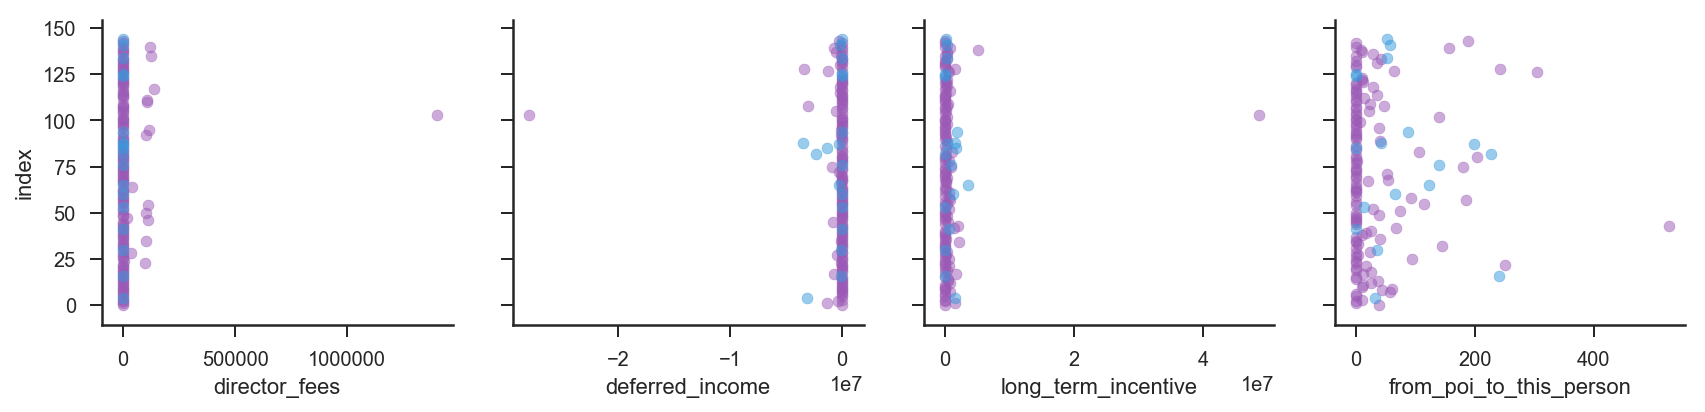

In [8]:
# plotting data

plot_features(data)

In [9]:
# print max values for every feature

max_val_feature()


salary
26704229
TOTAL

to_messages
15149
SHAPIRO RICHARD S

deferral_payments
32083396
TOTAL

total_payments
309886585
TOTAL

exercised_stock_options
311764000
TOTAL

bonus
97343619
TOTAL

restricted_stock
130322299
TOTAL

shared_receipt_with_poi
5521
BELDEN TIMOTHY N

restricted_stock_deferred
15456290
BHATNAGAR SANJAY

total_stock_value
434509511
TOTAL

expenses
5235198
TOTAL

loan_advances
83925000
TOTAL

from_messages
14368
KAMINSKI WINCENTY J

other
42667589
TOTAL

from_this_person_to_poi
609
DELAINEY DAVID W

director_fees
1398517
TOTAL

deferred_income
-833
BOWEN JR RAYMOND M

long_term_incentive
48521928
TOTAL

from_poi_to_this_person
528
LAVORATO JOHN J


In [10]:
### Task 2: Remove outliers

# TOTAL seems to be a problem, this is supported by look at original pdf file with financial records

data_dict.pop( 'TOTAL', 0 )

# additionally THE TRAVEL AGENCY IN THE PARK is not a person,
# but a corporate travel agency owned by sister of Kenneth Lay, also for removal

data_dict.pop( 'THE TRAVEL AGENCY IN THE PARK', 0 )

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [11]:
# reload data with new dictionary

data = data_create()

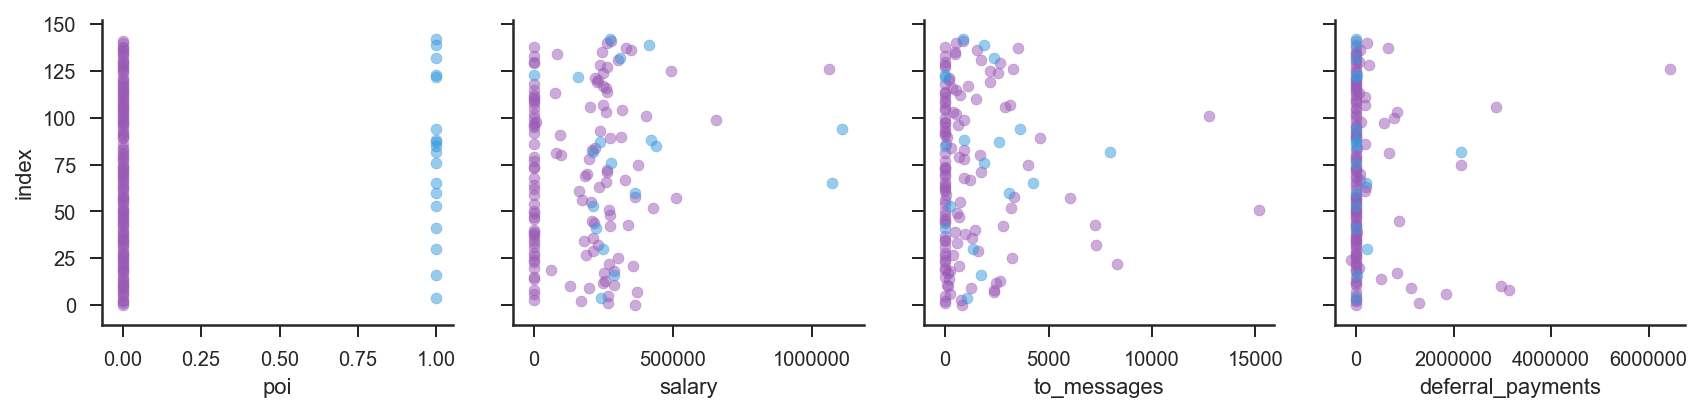

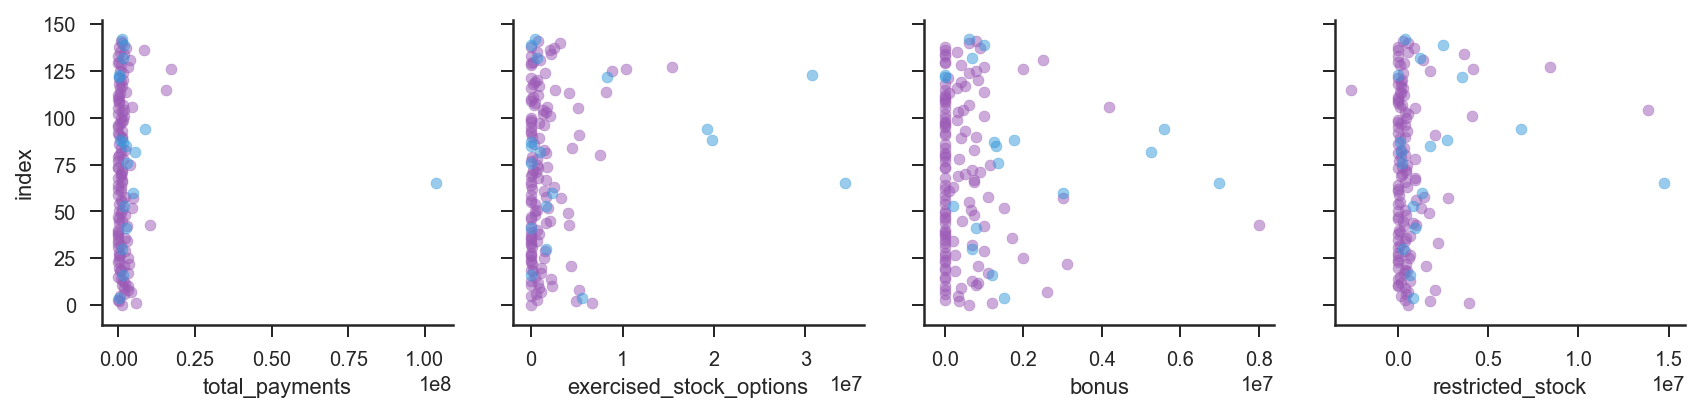

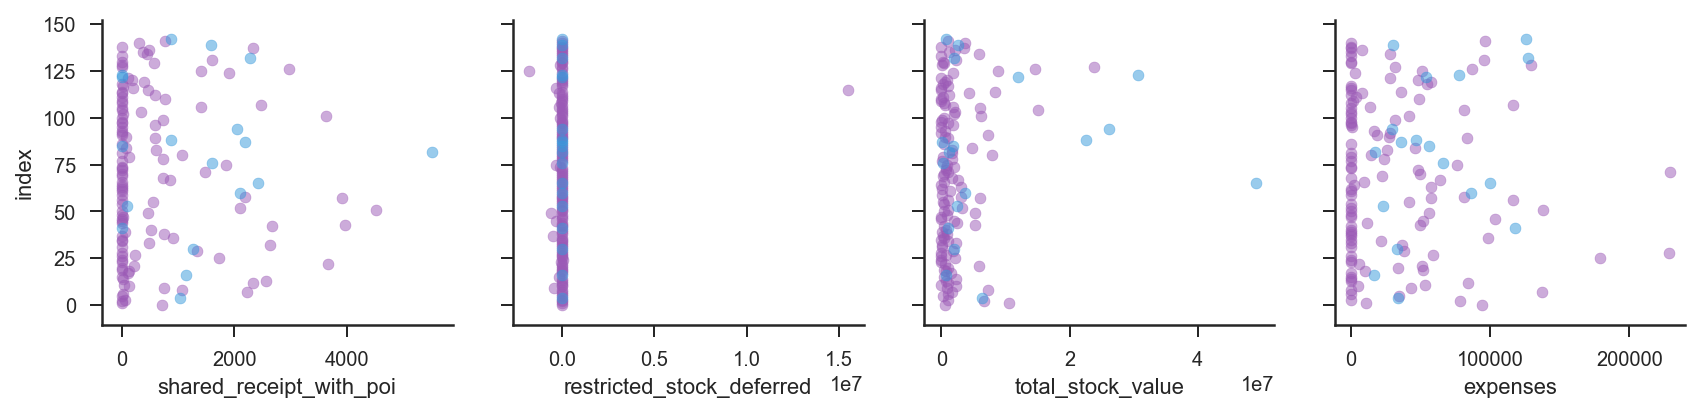

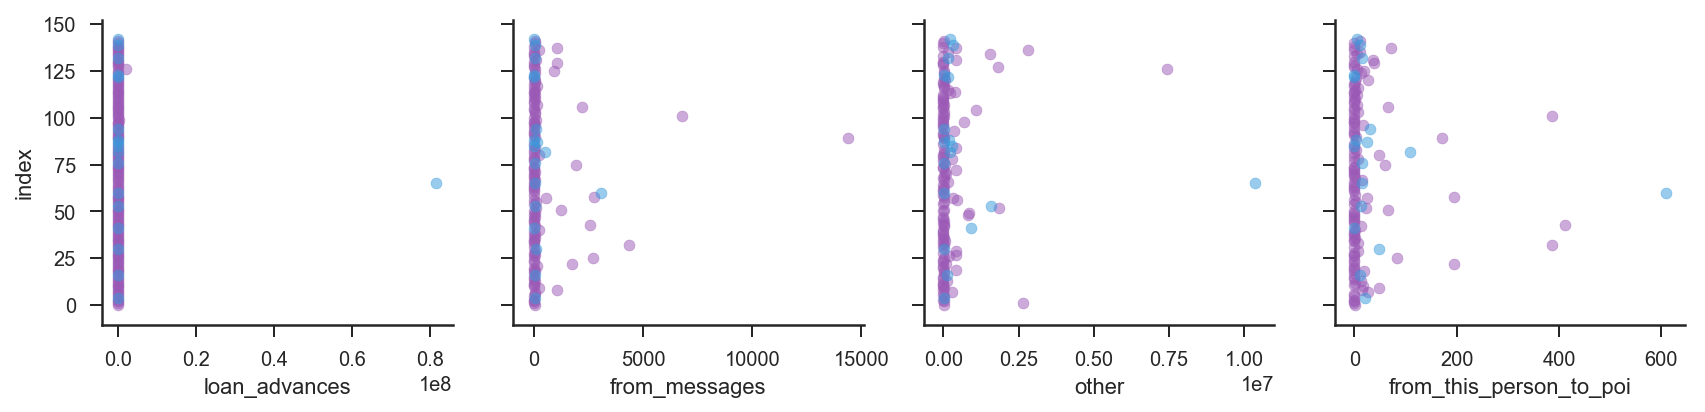

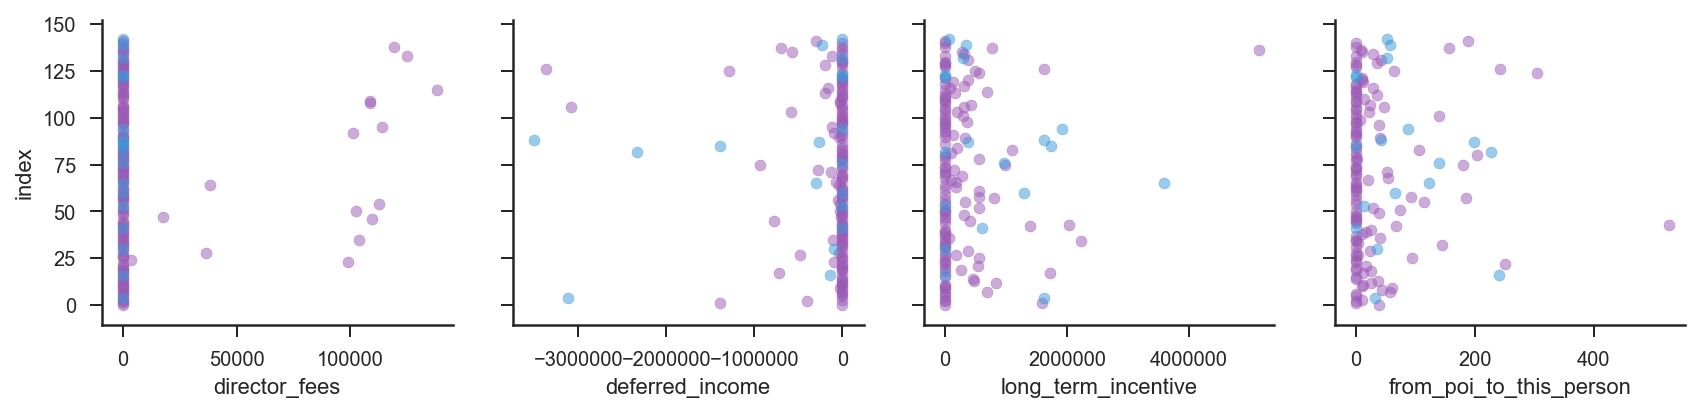

In [12]:
df = plot_features(data)

In [13]:
# print max values to asses if more outliers

max_val_feature()


salary
1111258
SKILLING JEFFREY K

to_messages
15149
SHAPIRO RICHARD S

deferral_payments
6426990
FREVERT MARK A

total_payments
103559793
LAY KENNETH L

exercised_stock_options
34348384
LAY KENNETH L

bonus
8000000
LAVORATO JOHN J

restricted_stock
14761694
LAY KENNETH L

shared_receipt_with_poi
5521
BELDEN TIMOTHY N

restricted_stock_deferred
15456290
BHATNAGAR SANJAY

total_stock_value
49110078
LAY KENNETH L

expenses
228763
MCCLELLAN GEORGE

loan_advances
81525000
LAY KENNETH L

from_messages
14368
KAMINSKI WINCENTY J

other
10359729
LAY KENNETH L

from_this_person_to_poi
609
DELAINEY DAVID W

director_fees
137864
BHATNAGAR SANJAY

deferred_income
-833
BOWEN JR RAYMOND M

long_term_incentive
5145434
MARTIN AMANDA K

from_poi_to_this_person
528
LAVORATO JOHN J


Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

At this point I will stop outier removal, extreme values for every feature are actual data points, I will want to retain those for further analysis.

In [14]:
my_dataset = data_dict

In [15]:
ratio_feature('ratio_from_poi','from_poi_to_this_person','to_messages')

In [16]:
ratio_feature('ratio_to_poi','from_this_person_to_poi','from_messages')

In [17]:
add_feature()

In [18]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.


# my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [19]:
data.shape

(143, 22)

In [20]:
# rescale data since most is in different units
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

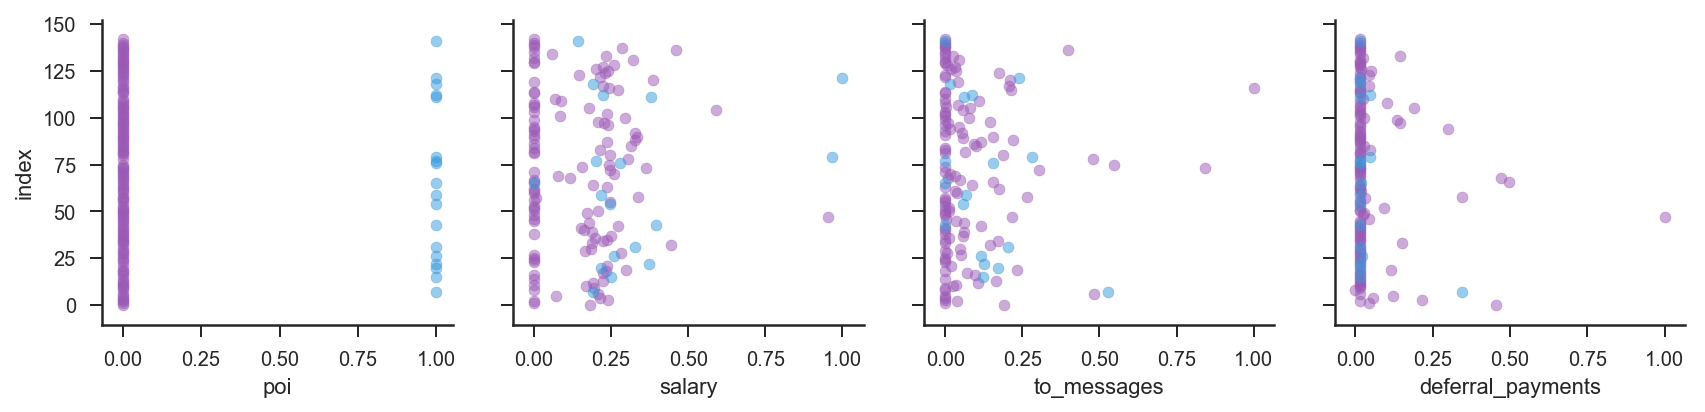

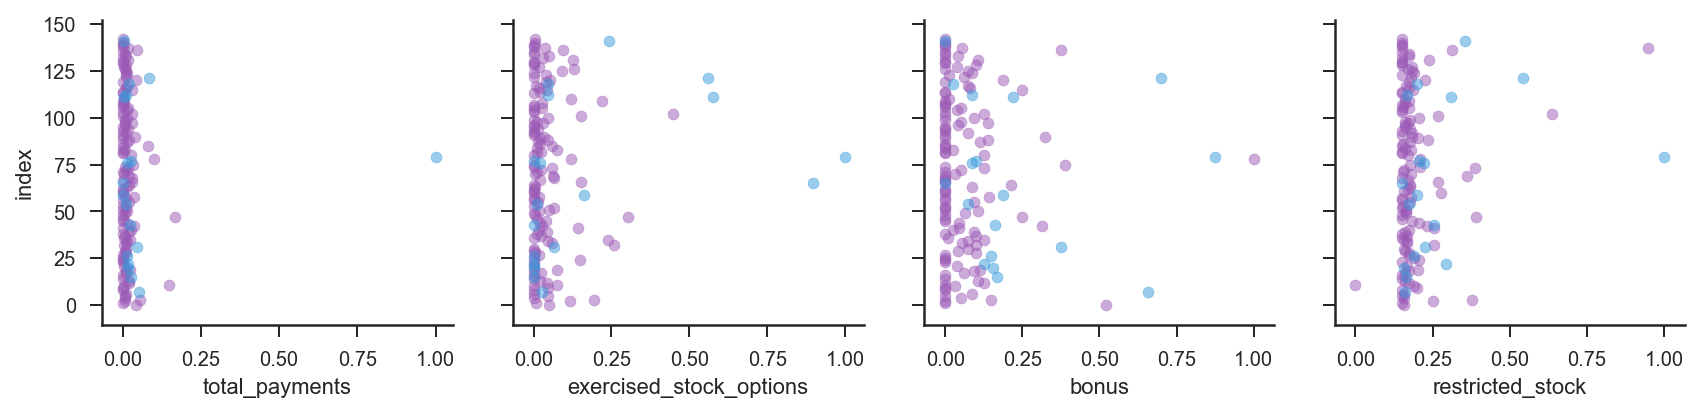

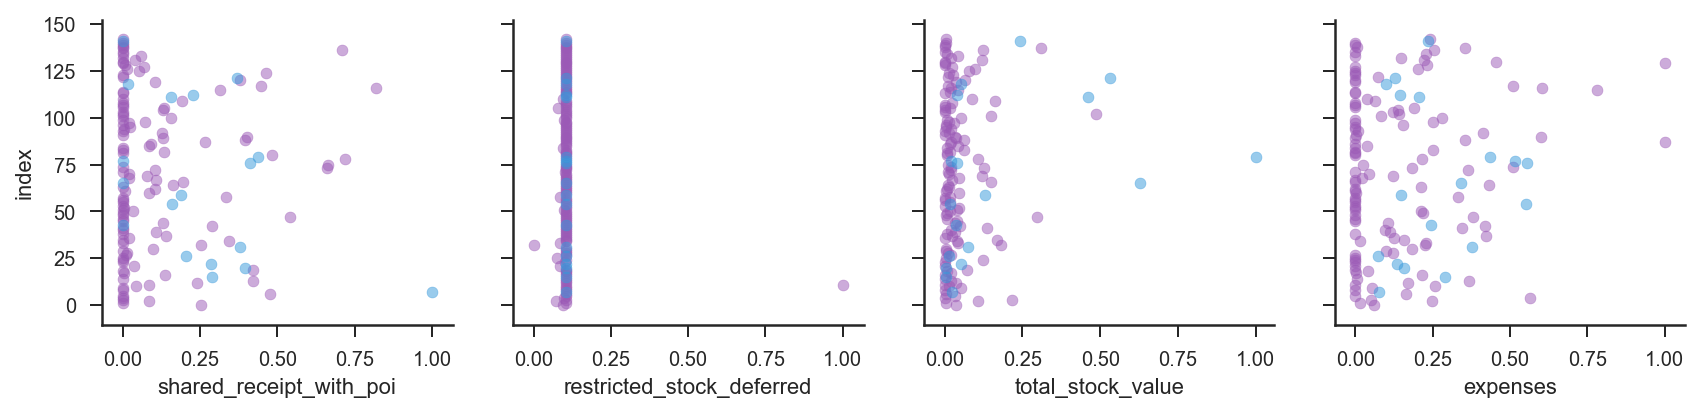

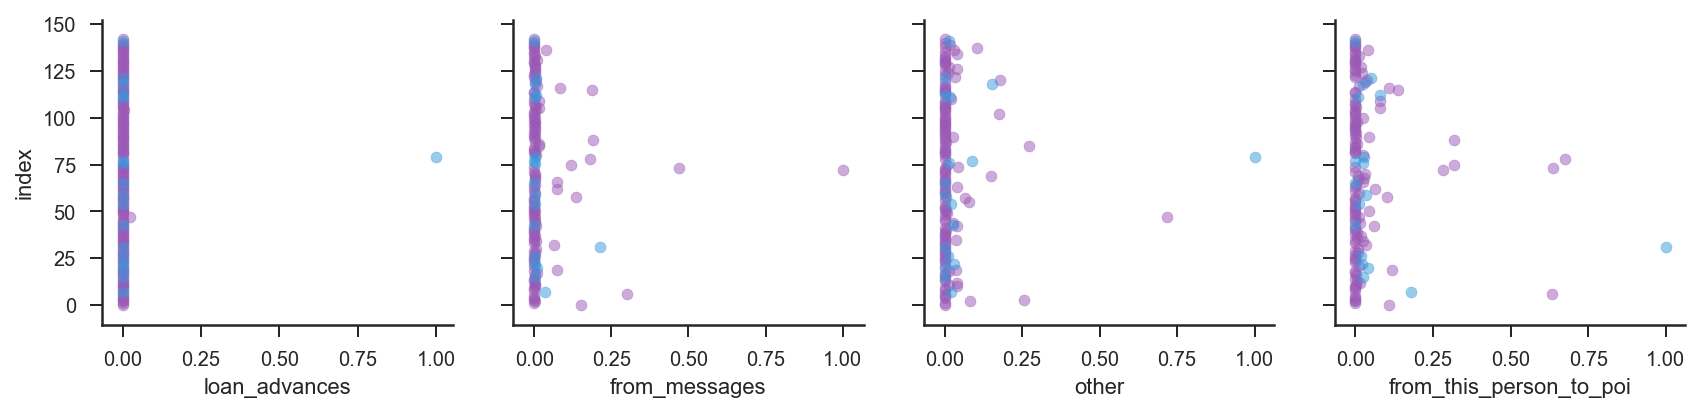

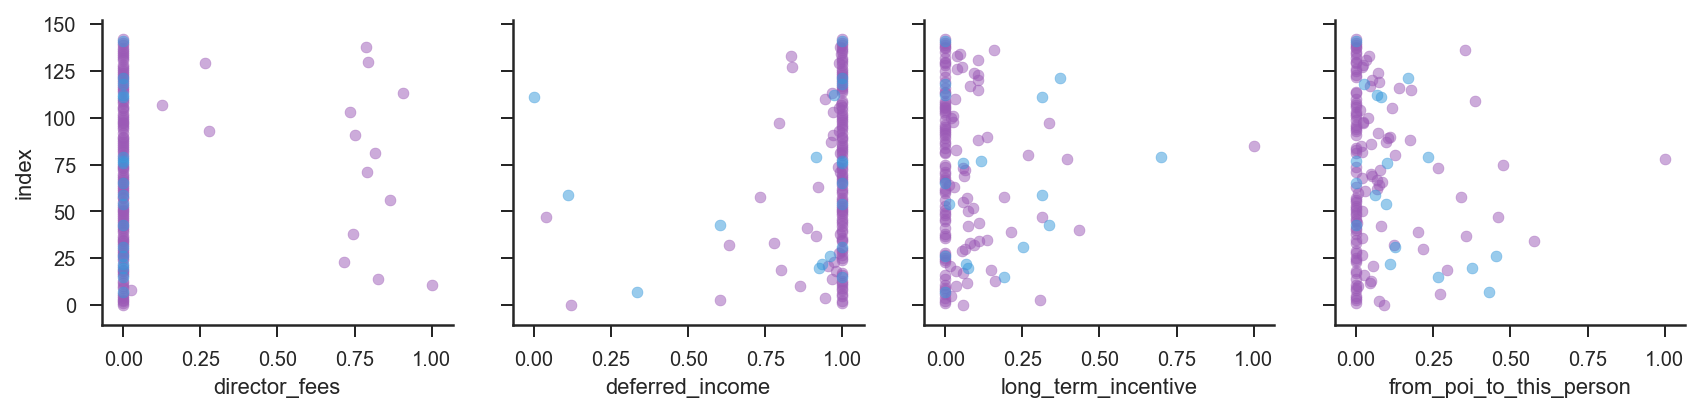

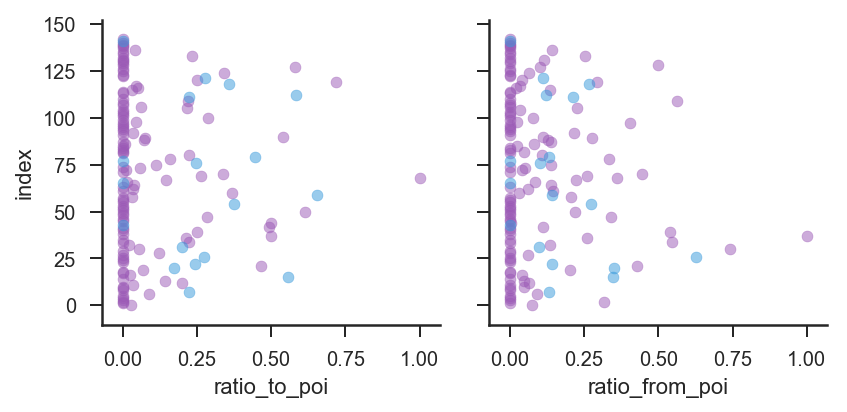

In [21]:
plot_features(data)

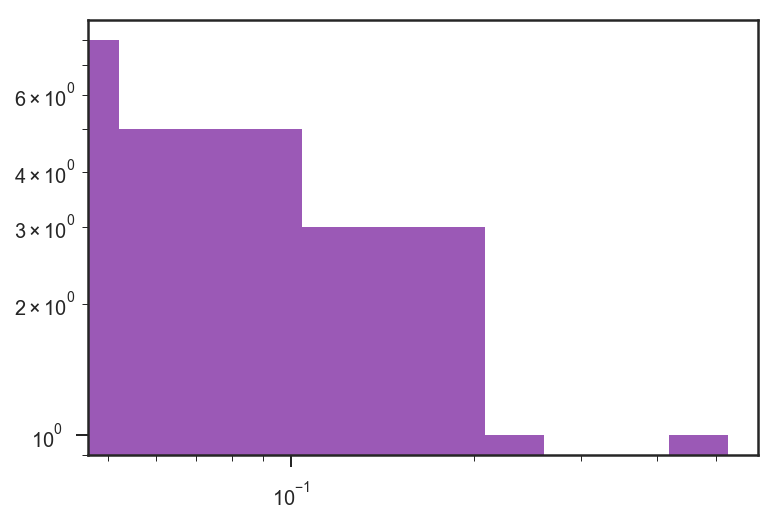

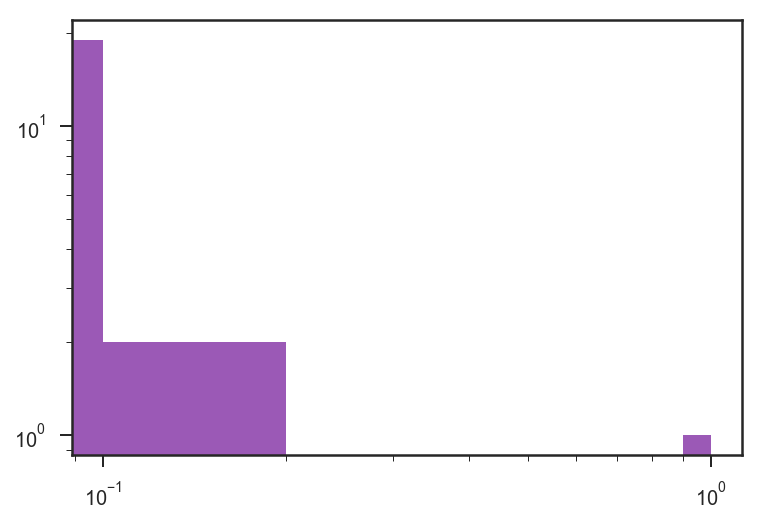

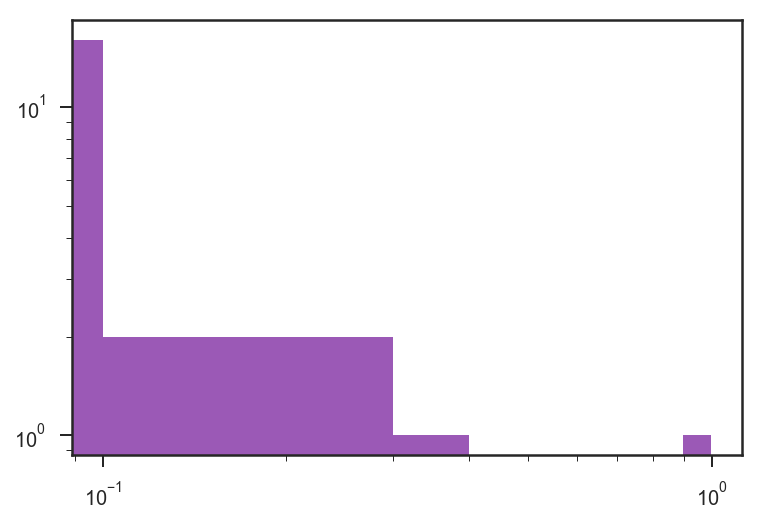

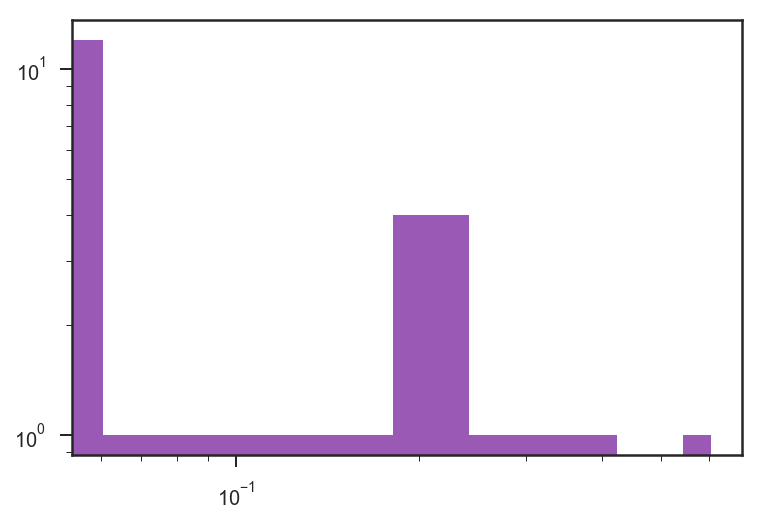

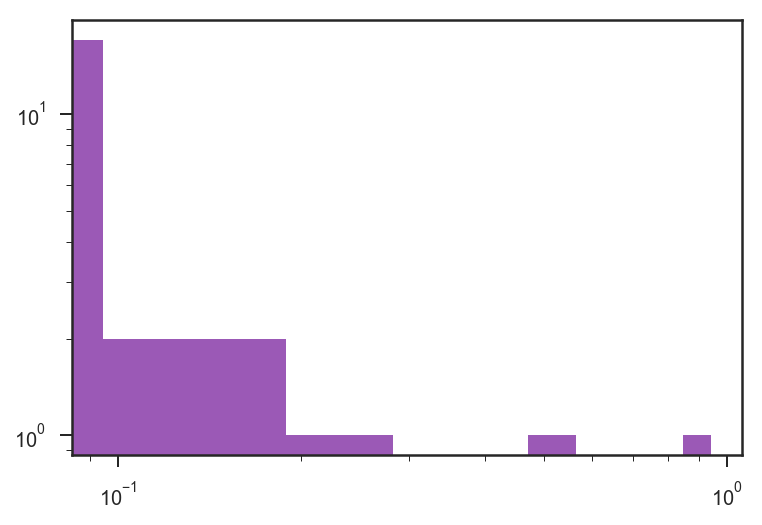

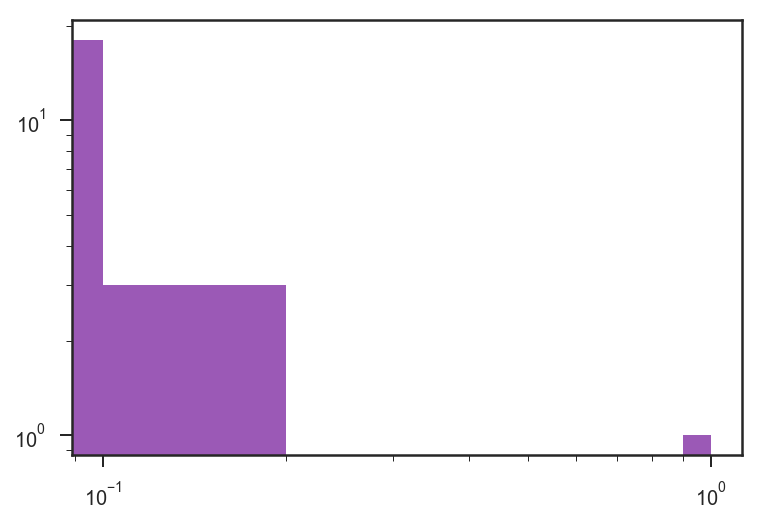

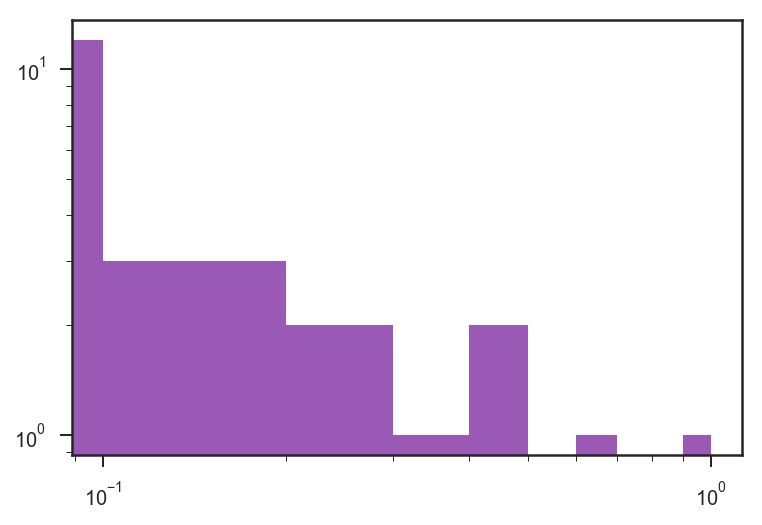

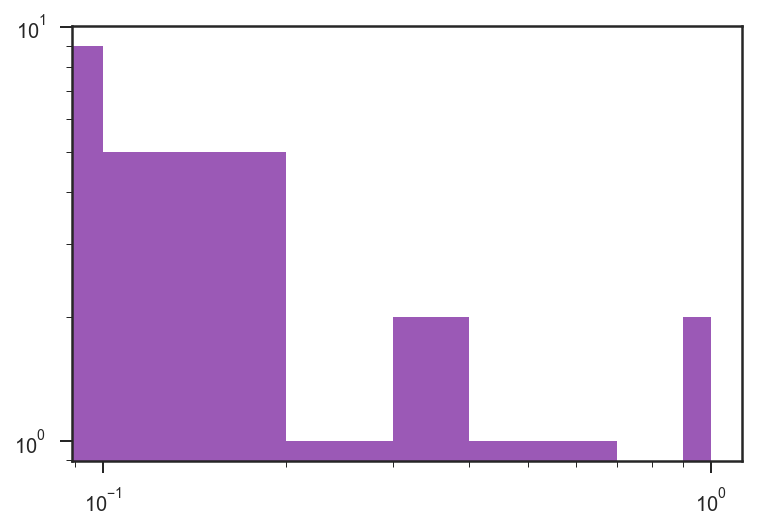

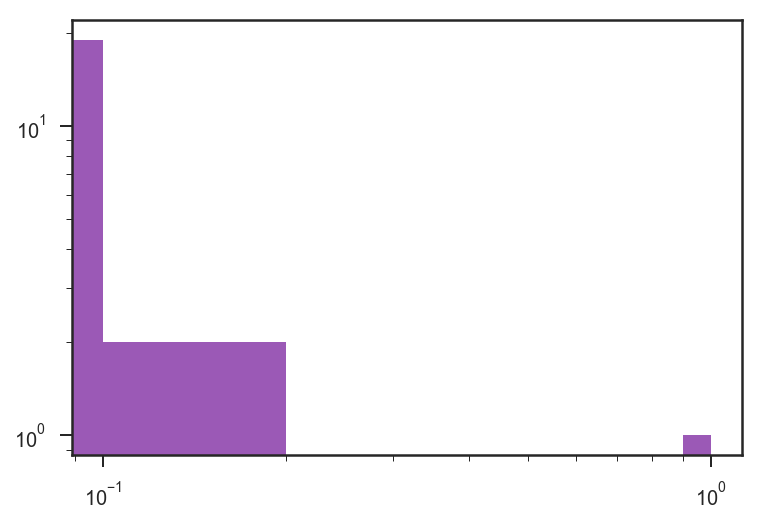

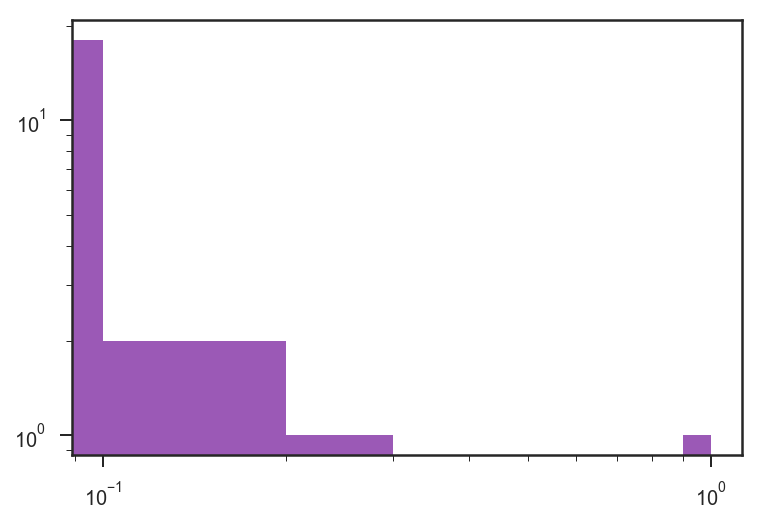

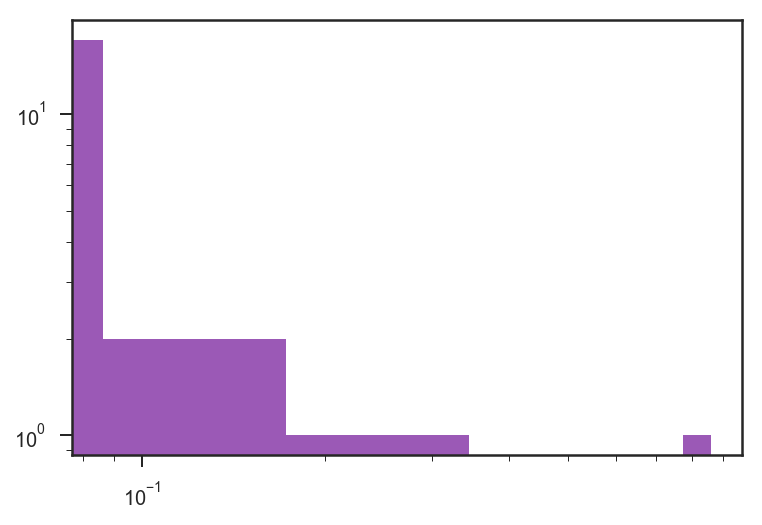

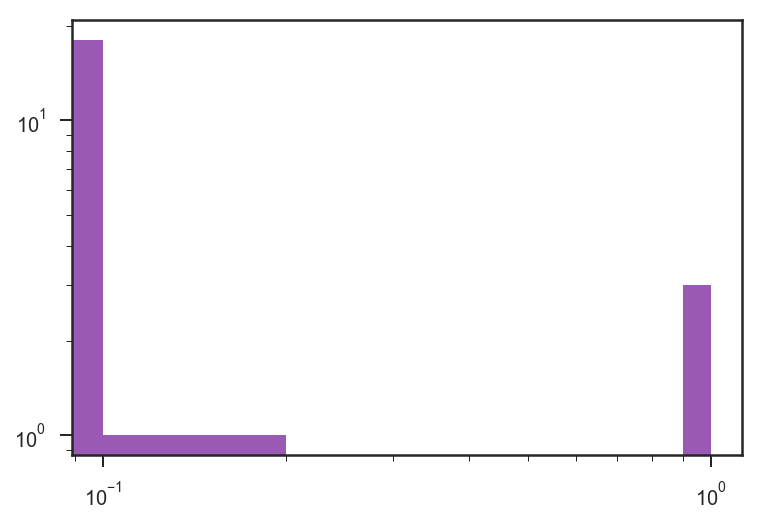

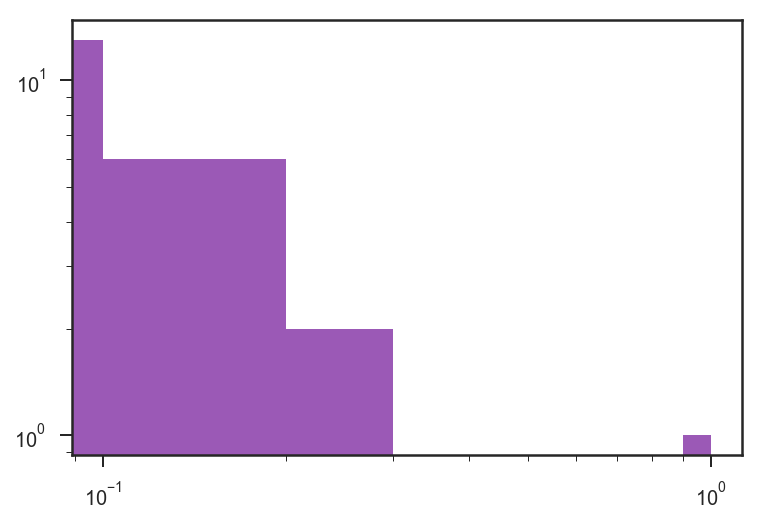

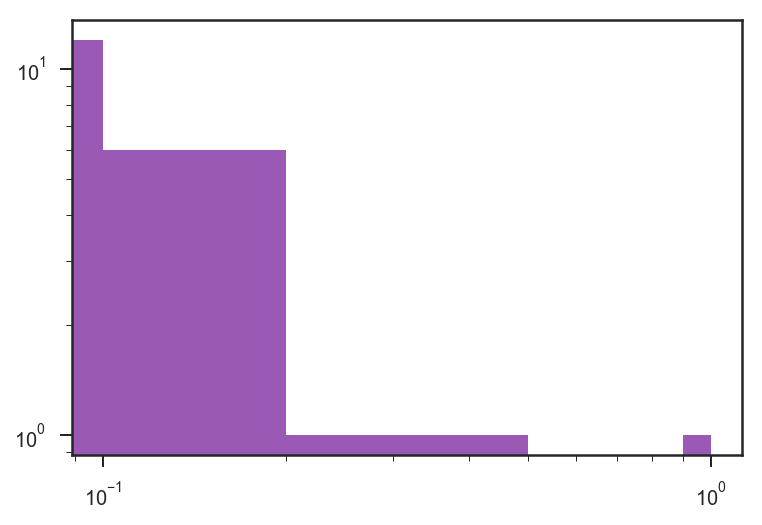

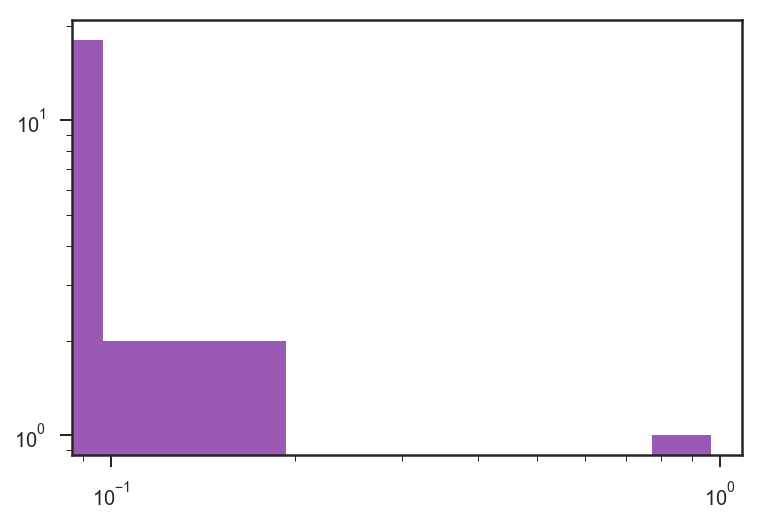

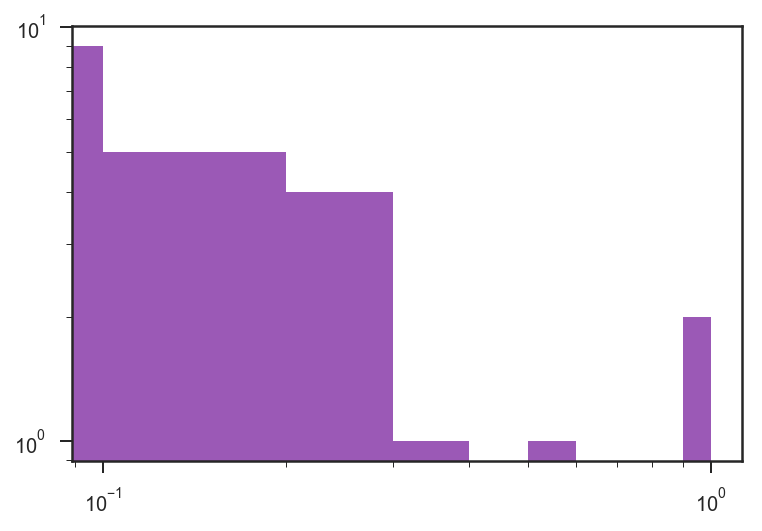

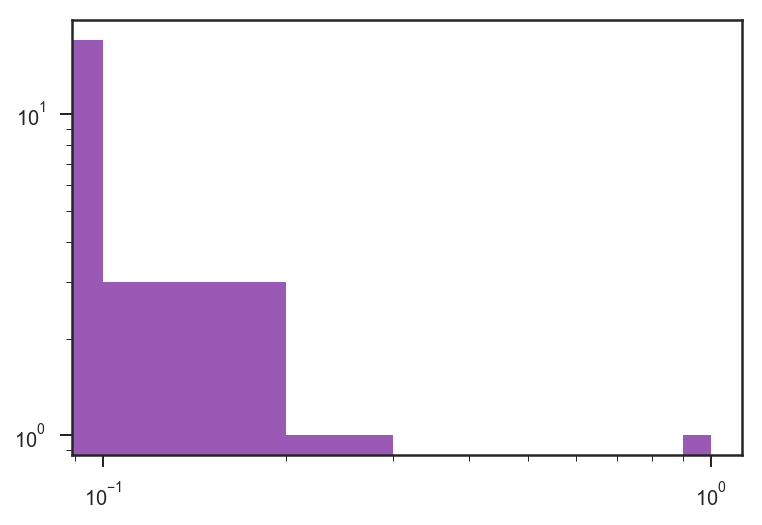

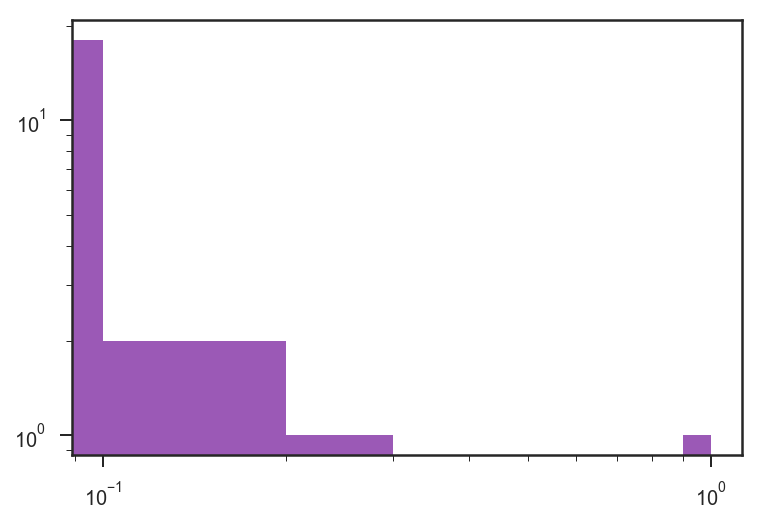

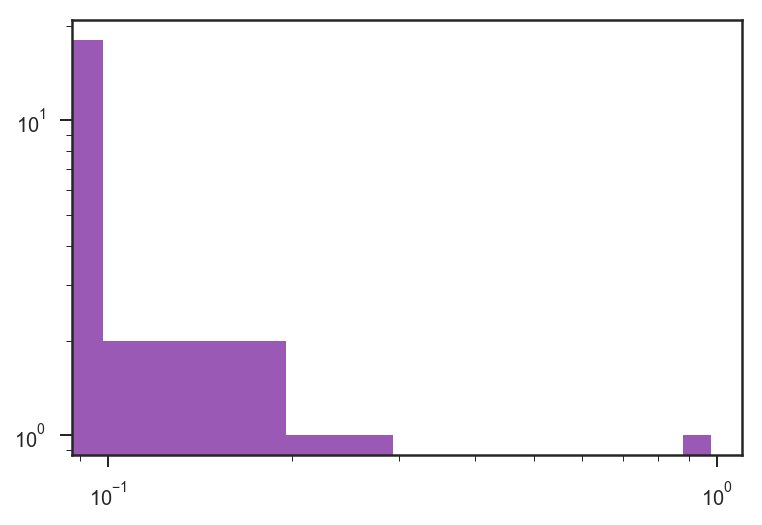

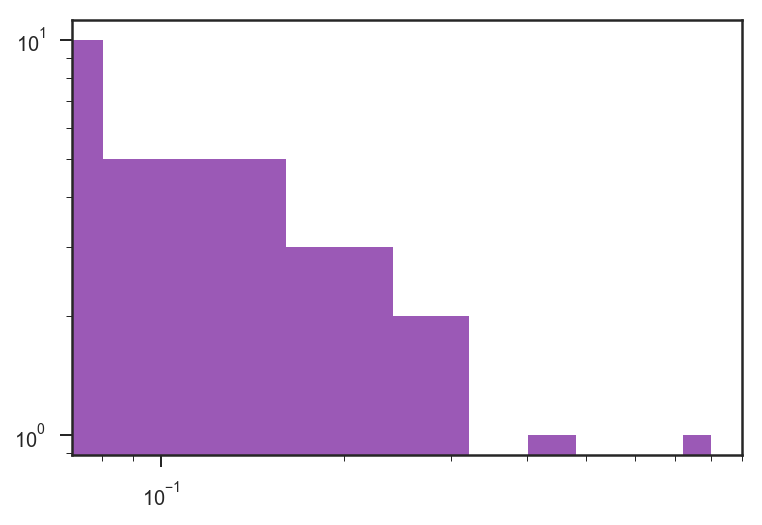

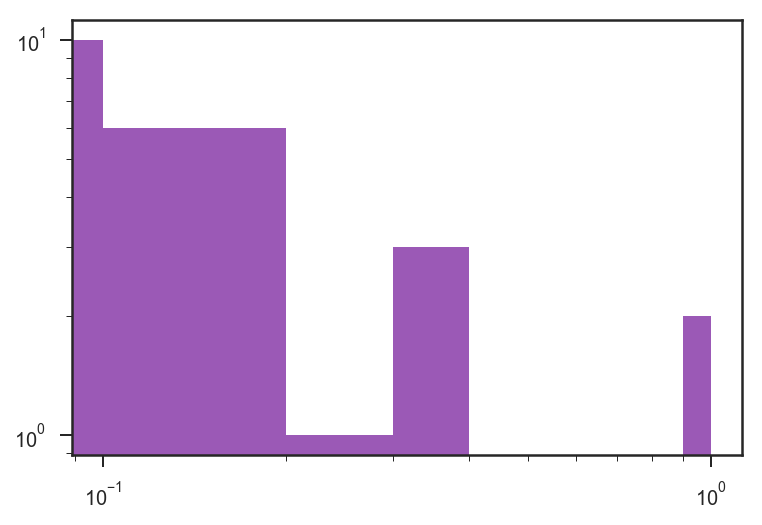

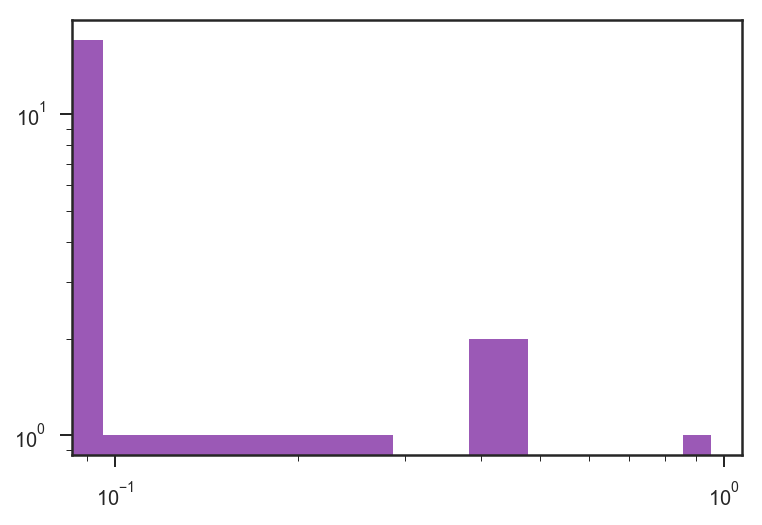

In [22]:
for i in range(len(data[1])):         
    plt.hist(data[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [24]:
def f(x):
    return {
        'a': 1,
        'b': 2
    }.get(x, 9) 

2

In [22]:
from sklearn.feature_selection import SelectKBest
selection = SelectKBest(k=10)
features = selection.fit_transform(features, labels)
features_selected = selection.get_support(indices = True)
print selection.scores_

[ 18.28968404   1.64634113   0.22461127   8.77277773  24.81507973
  20.79225205   9.21281062   8.58942073   0.06549965  24.18289868
   6.09417331   7.18405566   0.16970095   4.18747751   2.38261211
   2.1263278   11.45847658   9.92218601   5.24344971  16.40971255
   3.12809175]


In [ ]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2, random_state=42)

skbest = SelectKBest(k=20)  # try best value to fit
sk_transform = skbest.fit_transform(features_train, labels_train)
indices = skbest.get_support(True)
# print skbest.scores_

n_list = ['poi']
for index in indices:
    print 'features: %s score: %f' % (features_list[index + 1], skbest.scores_[index])
    n_list.append(features_list[index + 1])

# Test different algorithms

2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html



# LinearSVC
# KNeighbors Classifier
# SVC
# Ensemble Classifers

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Tune an algorithm

3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”




In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# Validation

5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

# Summary

6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]